In [21]:
#event log splitting on train/test

import random
import random as rand
import pandas as pd
import random as rand
import numpy as np
from random import choice
import string
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py
import time
import random
import math
import pandas as pd
import random as rand
from random import choice
import string
from pm4py.objects.log.importer.xes import importer as xes_importer


log = xes_importer.apply("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019.xes")
trace_counter = 0
for trace in log:
    trace_counter = trace_counter + 1
print('number of traces in log', trace_counter)
    
log = pm4py.convert_to_dataframe(log)


number_for_train = trace_counter / 100*30
number_for_train = int(number_for_train + (0.5 if number_for_train > 0 else -0.5))
print('Number of traces for train', number_for_train)


log2 = log["case:concept:name"].unique()
names_set =list(set(log2))
rand.shuffle(names_set)
#change numbers!!!
train_set = names_set[0:int(number_for_train)]
test_set = names_set[int(number_for_train):int(trace_counter)]
#print('train set', train_set)
#print('test set', test_set)


train_df = pd.DataFrame(train_set)
train_df.rename(columns={0:'case:concept:name'},inplace=True)
test_df = pd.DataFrame(test_set)
test_df.rename(columns={0:'case:concept:name'},inplace=True)




fromtrain = pd.merge(log, train_df, how="inner", on="case:concept:name")

fromtest = pd.merge(log, test_df, how="inner", on="case:concept:name")



fromtrain.to_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracestrain.csv")
fromtest.to_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracestest.csv")


fromtrain = pd.read_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracestrain.csv") #sep=',')
fromtrain = pm4py.format_dataframe(fromtrain)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
fromtrain = pm4py.convert_to_event_log(fromtrain)
for x in fromtrain:
    for y in x:
        del y["@@index"]
        del y["@@case_index"]
        del y["Unnamed: 0"]
pm4py.write_xes(fromtrain, "C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetrain.xes")


fromtest = pd.read_csv("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracestest.csv") #sep=',')
fromtest = pm4py.format_dataframe(fromtest)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
fromtest = pm4py.convert_to_event_log(fromtest)
for x in fromtest:
    for y in x:
        del y["@@index"]
        del y["@@case_index"]
        del y["Unnamed: 0"]
pm4py.write_xes(fromtest, "C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetest.xes")


parsing log, completed traces :: 100%|███████████████████████████████████████| 251734/251734 [01:42<00:00, 2449.32it/s]
C:\Users\I559643\Miniconda3\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


number of traces in log 251734
Number of traces for train 75520


C:\Users\I559643\AppData\Local\Temp\ipykernel_21492\701058420.py:64: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  fromtrain = pm4py.format_dataframe(fromtrain)  #case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
C:\Users\I559643\Miniconda3\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
exporting log, completed traces :: 100%|███████████████████████████████████████| 75520/75520 [00:27<00:00, 2709.14it/s]
C:\Users\I559643\AppData\Local\Temp\ipykernel_21492\701058420.py:77: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  fromtest = pm4py.format_data

parsing log, completed traces :: 100%|█████████████████████████████████████████| 75520/75520 [00:35<00:00, 2118.37it/s]


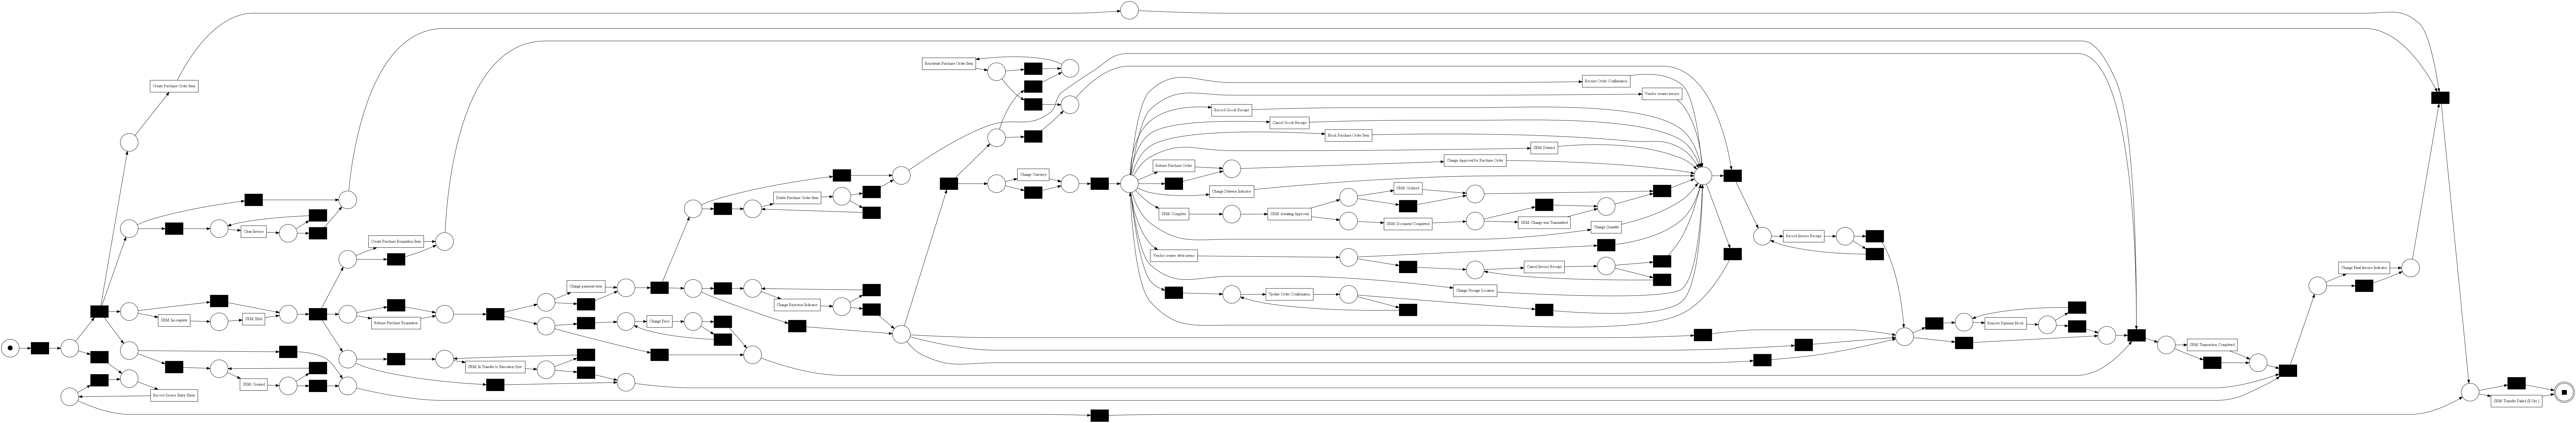

In [22]:
import pm4py

log = xes_importer.apply("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetrain.xes")
net, im, fm = pm4py.discover_petri_net_inductive(log, noise_threshold = 0.2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
#pm4py.save_vis_petri_net(net, im, fm, 'C:/Users/I559643/Documents/Thesis/Models and Logs/receipt/petri_net.png')
pn = pm4py.view_petri_net(net, im, fm)
pm4py.write_pnml(net, im, fm, 'C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetrain_IMf.pnml')
net, im, fm = pm4py.read_pnml("C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetrain_IMf.pnml")
bpmn_graph = pm4py.convert_to_bpmn(net, im, fm)
pm4py.write_bpmn(bpmn_graph, "C:/Users/I559643/Documents/Thesis/Models and Logs/BPI 2019/BPI_Challenge_2019 tracetrain_IMf_bpmn.bpmn")
